In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = pd.read_csv('Microbiome.csv', sep='\t')

#data = data.dropna(axis=0)
features.rename(columns = {'345dcc18d51f44572bd67c08e5e95b8b':'Endo1','074e66f75650948b8df12cfe2ffb5f37':'Endo2','060fdbbfa61cbfb4d47350dc2a2019cd':'Endo3','d2208d27b5df4c53eb547f7ac45f4d6b':'Endo4','574d164310944193d8fc13dc10346e58':'Endo5','8cb92babedb9f4ff7bedee4ac4f47370':'Endo6','3e00a33b844a56c2e00acedeffc43b5e':'Endo7','0f5f7693288de84f4ade2e6abaa2440f':'Endo8','561ed5d9dab98c645f731a40b7b63fa4':'Endo9','a6d4742d8c802171498b62b6d79b1764':'Endo10'}, inplace = True)
print(features.head())
RSEED = 18

    Maize_Sample  Endo1  Endo2  Endo3  Endo4  Endo5  Endo6  Endo7  Endo8  \
0  GA188repBS600      0      0      1      0      0      0      0      1   
1    GA1811S1400      1      0      1      0      0      0      0      1   
2    GA1824S1400      1      0      1      0      0      0      0      1   
3  GA1829SLM1400      0      0      1      0      0      0      1      1   
4    GA1813I1400      1      0      1      0      0      1      0      1   

   Endo9  ...  Pb_ppm Zn_ppm Organic_Matter_perc N_perc  Sampling_NumberGDD  \
0      0  ...    0.66   4.27                3.29   0.17              8600.0   
1      0  ...    0.26   6.98                2.28   0.08            111400.0   
2      0  ...    0.06  10.39                3.32   0.10            241400.0   
3      0  ...    0.35   3.90                3.03   0.11            291400.0   
4      0  ...    1.17   1.75                1.44   0.07            131400.0   

  Plate Row  Column  Well  Concentration  
0     5   H      12   H12

In [2]:
#Drop unecessary columns
features = features.drop(['PlantA_Or_B','Notes','GA_Microbiome','Living_Mulch','Endophyte','R1_Fastq_Name','R2_Fastq_Name','Sample_or_Control','Sampling_Number','Plate','Row','Column','Well','Soil_Test_Number','Maize_Sample','Living_Mulch_Treatment','reads','quant_reading','Concentration'], axis =1)
print('We have {} instances of data with {} variables'.format(*features.shape))
print(features.isna())
#Drop rows with nulls or nas
features = features.dropna(axis=0, how='any')
print('Drop: We have {} instances of data with {} variables'.format(*features.shape))

We have 430 instances of data with 46 variables
     Endo1  Endo2  Endo3  Endo4  Endo5  Endo6  Endo7  Endo8  Endo9  Endo10  \
0    False  False  False  False  False  False  False  False  False   False   
1    False  False  False  False  False  False  False  False  False   False   
2    False  False  False  False  False  False  False  False  False   False   
3    False  False  False  False  False  False  False  False  False   False   
4    False  False  False  False  False  False  False  False  False   False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
425  False  False  False  False  False  False  False  False  False   False   
426  False  False  False  False  False  False  False  False  False   False   
427  False  False  False  False  False  False  False  False  False   False   
428  False  False  False  False  False  False  False  False  False   False   
429  False  False  False  False  False  False  False  False  False   False   

     ...  Mn_pp

In [3]:
print('We have {} instances of data with {} variables'.format(*features.shape))

# One-hot encode the data using pandas get_dummies to fix categorical data
features = pd.get_dummies(features)

print('Hot encode: We have {} instances of data with {} variables'.format(*features.shape))
# dataframe.size 
size = features.size 
features.iloc[:,5:].head(5)


We have 409 instances of data with 46 variables
Hot encode: We have 409 instances of data with 80 variables


Endo6  Endo7  Endo8  Endo9  Endo10  Growing_Degree_Days  GPSlatitude  \
0      0      0      1      0       1                600.0     32.96009   
1      0      0      1      0       1               1400.0     32.50154   
2      0      0      1      0       1               1400.0     33.86812   
3      0      1      1      0       1               1400.0     33.86799   
4      1      0      1      0       1               1400.0     32.89258   

   GPSlongitude  precipIntensity  precipProbability  ...  \
0     -82.41694         0.003618           0.356885  ...   
1     -83.94552         0.003677           0.300328  ...   
2     -83.44997         0.003721           0.330000  ...   
3     -83.45004         0.003721           0.330000  ...   
4     -82.76496         0.003480           0.314262  ...   

   Date_Taken_2018-06-20  Date_Taken_2018-06-21  Date_Taken_2018-06-28  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      1                      0   
3                      0                      0                      1   
4                      0                      0                      0   

   Date_Taken_2018-07-02  Date_Taken_2018-07-09  Sample_Type_Inrow_Soil  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      0                       1   

   Sample_Type_Rhizosphere  Sample_Type_Root  Sample_Type_Soil  \
0                        0                 0                 1   
1                        0                 0                 1   
2                        0                 0                 1   
3                        0                 0                 1   
4                        0                 0                 0   

   Sample_Type_Stalk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 75 columns]

In [4]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Endo5'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('Endo5', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
print(feature_list)

['Endo1', 'Endo2', 'Endo3', 'Endo4', 'Endo6', 'Endo7', 'Endo8', 'Endo9', 'Endo10', 'Growing_Degree_Days', 'GPSlatitude', 'GPSlongitude', 'precipIntensity', 'precipProbability', 'temperatureHigh', 'temperatureLow', 'dewPoint', 'humidity', 'windSpeed', 'uvIndex', 'Lime_Buffer_Capacity', 'pH', 'Water_pH', 'Base_Saturation_perc', 'Cation_Exchange_Capacity', 'Ca_ppm', 'Cd_ppm', 'Cr_ppm', 'Cu_ppm', 'Fe_ppm', 'K_ppm', 'Mg_ppm', 'Mn_ppm', 'Mo_ppm', 'Na_ppm', 'Ni_ppm', 'P_ppm', 'Pb_ppm', 'Zn_ppm', 'Organic_Matter_perc', 'N_perc', 'Sampling_NumberGDD', 'Location_Arlington', 'Location_Athens', 'Location_Blairsville', 'Location_Cave_Spring', 'Location_Dawson', 'Location_Fitzgerald', 'Location_Fort_Valley', 'Location_Hawkinsville', 'Location_Midville', 'Location_Pavo', 'Location_Plains_Production_corn', 'Location_Plains_SWVT', 'Location_Rome', 'Location_Tennile', 'Location_Tifton-Dryland', 'Location_Tifton-Irrigated', 'Location_Wadley', 'Location_Watkinsville', 'Location_Watkinsville_IronHorse', 'D

In [5]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = RSEED)

In [6]:
#CHECK the above step actually worked
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (306, 79)
Training Labels Shape: (306,)
Testing Features Shape: (103, 79)
Testing Labels Shape: (103,)


In [7]:
# The baseline predictions are if we predicted based on 
baseline_preds = test_features[:, feature_list.index('precipIntensity')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

#This doesnt work for pH or water_ph why? Since our labels are 0s and 1s, I think .48 is 48% off prediction

Average baseline error:  0.2


In [8]:
model = RandomForestClassifier(n_estimators=10000, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)


In [9]:
model.fit(train_features, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 10000 out of 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=18, verbose=1,
                       warm_start=False)

In [10]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train_features)
train_rf_probs = model.predict_proba(train_features)[:, 1]

# # Testing predictions (to determine performance)
rf_predictions = model.predict(test_features)
rf_probs = model.predict_proba(test_features)[:, 1]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 8434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 10000 out of 10000 | elapsed:

In [11]:
y_pred = model.predict(test_features)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 8434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 10000 out of 10000 | elapsed:

In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,y_pred)
cm

array([[81,  2],
       [ 7, 13]], dtype=int64)

In [13]:
from sklearn import metrics

print("Model Score:", model.score(test_features,test_labels))

print("Model Accuracy:", metrics.accuracy_score(test_labels,y_pred) )

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 8434 tasks      | elapsed:    0.7s


Model Score: 0.912621359223301
Model Accuracy: 0.912621359223301


[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 10000 out of 10000 | elapsed:    0.9s finished


In [14]:
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

Endo4                      0.095422
Sample_Type_Stalk          0.075686
Endo9                      0.072888
Endo2                      0.069932
Endo7                      0.058710
                             ...   
Location_Arlington         0.000343
Date_Taken_2018-05-18      0.000312
Location_Cave_Spring       0.000311
Location_Tifton-Dryland    0.000099
Date_Taken_2018-06-28      0.000009
Length: 79, dtype: float64

No handles with labels found to put in legend.


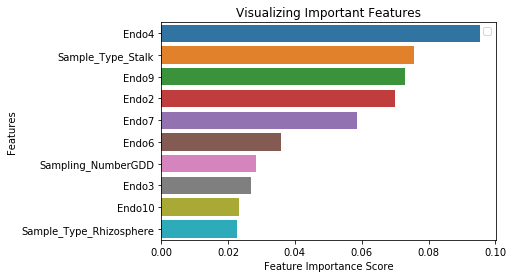

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [113]:
print(feature_imp.index[0])
print(feature_imp.index[1])
print(feature_imp.index[2])
v1 = feature_imp.index[0]
v2 = feature_imp.index[1]
v3 = feature_imp.index[2]
vdf = pd.read_csv('Microbiome.csv', sep='\t')

#data = data.dropna(axis=0)
vdf.rename(columns = {'345dcc18d51f44572bd67c08e5e95b8b':'Endo1','074e66f75650948b8df12cfe2ffb5f37':'Endo2','060fdbbfa61cbfb4d47350dc2a2019cd':'Endo3','d2208d27b5df4c53eb547f7ac45f4d6b':'Endo4','574d164310944193d8fc13dc10346e58':'Endo5','8cb92babedb9f4ff7bedee4ac4f47370':'Endo6','3e00a33b844a56c2e00acedeffc43b5e':'Endo7','0f5f7693288de84f4ade2e6abaa2440f':'Endo8','561ed5d9dab98c645f731a40b7b63fa4':'Endo9','a6d4742d8c802171498b62b6d79b1764':'Endo10'}, inplace = True)

#Drop unecessary columns
vdf = vdf.drop(['PlantA_Or_B','Notes','GA_Microbiome','Living_Mulch','Endophyte','R1_Fastq_Name','R2_Fastq_Name','Sample_or_Control','Sampling_Number','Plate','Row','Column','Well','Soil_Test_Number','Maize_Sample','Living_Mulch_Treatment','reads','quant_reading','Concentration'], axis =1)

#Drop rows with nulls or nas
vdf = vdf.dropna(axis=0, how='any')

# One-hot encode the data using pandas get_dummies to fix categorical data
vdf = pd.get_dummies(vdf)

print("\n")
print('Hot encode: We have {} instances of data with {} variables'.format(*features.shape))
# dataframe.size 
size = vdf.size 
vdf.iloc[:,5:].head(5)

print("\n")
# print(v2)
# print(vdf[v2])

# You have to pip install matplotlib-venn first
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from pandas import *

a = 0
b = 0
c = 0

d = 0
e = 0
f = 0

h = 0
i = 0
j = 0

# vdf.loc[vdf['Endo5']] == 1, a = a +1
# vdf.loc[vdf[v1]] == 1, b = b + 1

#V1
for index, row in vdf.iterrows():
    if row['Endo5'] == 1 and row[v1] == 0: 
        a = a + 1
    if row['Endo5'] == 1 and row[v1] == 1: 
        b = b + 1
    if row['Endo5'] == 0 and row[v1] == 1: 
        c = c + 1
plt1 = venn2(subsets = (a, c, b), set_labels = ('OTU Present',  v1))




Endo4
Sample_Type_Stalk
Endo9


Hot encode: We have 409 instances of data with 79 variables




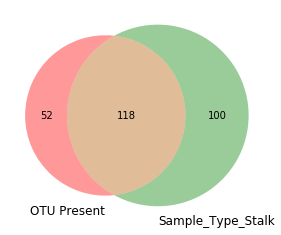

In [115]:
#V2
for index, row in vdf.iterrows():
    if row['Endo5'] == 1 and row[v2] == 0: 
        d = d + 1
    if row['Endo5'] == 1 and row[v2] == 1: 
        e = e + 1
    if row['Endo5'] == 0 and row[v2] == 1: 
        f = f + 1
plt2 = venn2(subsets = (d, f, e), set_labels = ('OTU Present',  v2))

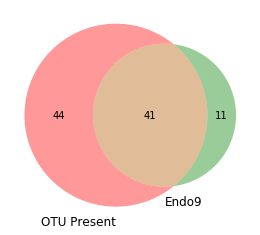

In [116]:
#V3
for index, row in vdf.iterrows():
    if row['Endo5'] == 1 and row[v3] == 0: 
        h = h + 1
    if row['Endo5'] == 1 and row[v3] == 1: 
        i = i + 1
    if row['Endo5'] == 0 and row[v3] == 1: 
        j = j + 1
plt3 = venn2(subsets = (h, j, i), set_labels = ('OTU Present',  v3))

In [ ]:
fig = plt.figure()


In [16]:
print("Time to try support vector machine learning")


# print('Training Features Shape:', train_features.shape)
# print('Training Labels Shape:', train_labels.shape)
# print('Testing Features Shape:', test_features.shape)
# print('Testing Labels Shape:', test_labels.shape)

Time to try support vector machine learning


In [17]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=1.91,gamma='scale') # Linear Kernel

#Train the model using the training sets
clf.fit(train_features, train_labels)

#Predict the response for test dataset
r_pred = clf.predict(test_features)

In [18]:
cf = confusion_matrix(test_labels,r_pred)
cf

array([[83,  0],
       [20,  0]], dtype=int64)

In [19]:
print("Accuracy:",metrics.accuracy_score(test_labels, r_pred))

Accuracy: 0.8058252427184466


In [20]:
#Why am I running recursive feature elimination?
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

svm = LinearSVC()
rfe = RFE(svm, 4)
rfe = rfe.fit(train_features,train_labels)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

[False False False  True False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False  True False False False False]
[23  6  2  1 24 10 11  1 14 54 28 29 73 51 37 30 50 61 36 57 59 25 18 60
 33 47 55 63 22 42 41 46 44 67 39 48 40 31 56 35 32 62  8 66 68 53 38 45
 58 43 34 49  5 13 65  7 19 64 12  9 21  1  4 71 20 26 52 27 72 70 69 75
 74 76  1  3 16 15 17]


C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [21]:
# Native Bayes Gaussian

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(train_features, train_labels)

g_pred = gnb.predict(test_features)


In [22]:
print("Accuracy:",metrics.accuracy_score(test_labels, g_pred))
cg = confusion_matrix(test_labels,g_pred)
cg

Accuracy: 0.6893203883495146


array([[65, 18],
       [14,  6]], dtype=int64)

In [23]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc = dtc.fit(train_features, train_labels)

d_pred = dtc.predict(test_features)

In [24]:
print("Accuracy:",metrics.accuracy_score(test_labels, d_pred))
cd = confusion_matrix(test_labels,d_pred)
cd

Accuracy: 0.8543689320388349


array([[78,  5],
       [10, 10]], dtype=int64)

In [25]:
#Neural Network Classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(79,79,79), activation='relu', solver='adam', max_iter=100000)
mlp.fit(train_features, train_labels)
n_pred = mlp.predict(test_features)

In [26]:
print("Accuracy:",metrics.accuracy_score(test_labels, n_pred))
cn = confusion_matrix(test_labels,n_pred)
cn

Accuracy: 0.8058252427184466


array([[83,  0],
       [20,  0]], dtype=int64)

In [27]:
#Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=1000, learning_rate=1)
abc.fit(train_features,train_labels)
a_pred = abc.predict(test_features)


In [28]:
print("Accuracy:",metrics.accuracy_score(test_labels, a_pred))
ca = confusion_matrix(test_labels,a_pred)
ca

Accuracy: 0.8640776699029126


array([[79,  4],
       [10, 10]], dtype=int64)

In [29]:
print("Random Forest Stats:")
display(cm)
print("RF Accuracy:", metrics.accuracy_score(test_labels,y_pred) )

print("\n" + "Decision Tree Stats:")
display(cd)
print("DT Accuracy:",metrics.accuracy_score(test_labels, d_pred))

print("\n" + "Ada Boost Classifier Stats:")
display(ca)
print("ABC Accuracy:",metrics.accuracy_score(test_labels, a_pred))

print("\n" + "Support Vector Machine Stats:")
display(cf)
print("SVM Accuracy:",metrics.accuracy_score(test_labels, r_pred))

print("\n" + "Naive Bayes Stats:")
display(cg)
print("NB Accuracy:",metrics.accuracy_score(test_labels, g_pred))

print("\n" + "Neural Network Stats:")
display(cn)
print("Nn Accuracy:",metrics.accuracy_score(test_labels, n_pred))


Random Forest Stats:


array([[81,  2],
       [ 7, 13]], dtype=int64)

RF Accuracy: 0.912621359223301

Decision Tree Stats:


array([[78,  5],
       [10, 10]], dtype=int64)

DT Accuracy: 0.8543689320388349

Ada Boost Classifier Stats:


array([[79,  4],
       [10, 10]], dtype=int64)

ABC Accuracy: 0.8640776699029126

Support Vector Machine Stats:


array([[83,  0],
       [20,  0]], dtype=int64)

SVM Accuracy: 0.8058252427184466

Naive Bayes Stats:


array([[65, 18],
       [14,  6]], dtype=int64)

NB Accuracy: 0.6893203883495146

Neural Network Stats:


array([[83,  0],
       [20,  0]], dtype=int64)

Nn Accuracy: 0.8058252427184466
